In [1]:
import pandas as pd 

data = pd.read_csv("5BL lab 09 (1).csv")
data = data.drop(columns=["Phase shift C, (msec)", "Phase shift C (degrees)"], axis=1)
data

,Frequency (kHz),CH1 V,CH2 V,ms/div,V0 (Volts),VC (Volts),Phase shift (divisions)
0,0.05,2,0.02,10.00,4,0.03,0.1
1,0.10,2,0.02,4.00,4,0.04,0.3
2,0.50,2,0.05,1.00,4,0.12,0.4
3,1.00,2,0.10,0.40,4,0.24,0.6
4,5.00,2,0.50,0.10,4,1.20,0.4
5,10.00,2,1.00,0.04,4,2.20,0.4
6,50.00,2,2.00,0.01,4,4.00,0.0


In [2]:
data.rename(columns={'Frequency (kHz)': 'Frequency (Hz)'}, inplace=True)
data["Frequency (Hz)"] = data["Frequency (Hz)"] * 1000
data["Phase shift (msec)"] = data["ms/div"] * data["Phase shift (divisions)"]
data["Phase shift (deg)"] = data["Phase shift (msec)"] / 1000 * data["Frequency (Hz)"] * 360

data

,Frequency (Hz),CH1 V,CH2 V,ms/div,V0 (Volts),VC (Volts),Phase shift (divisions),Phase shift (msec),Phase shift (deg)
0,50.0,2,0.02,10.00,4,0.03,0.1,1.000,18.0
1,100.0,2,0.02,4.00,4,0.04,0.3,1.200,43.2
2,500.0,2,0.05,1.00,4,0.12,0.4,0.400,72.0
3,1000.0,2,0.10,0.40,4,0.24,0.6,0.240,86.4
4,5000.0,2,0.50,0.10,4,1.20,0.4,0.040,72.0
5,10000.0,2,1.00,0.04,4,2.20,0.4,0.016,57.6
6,50000.0,2,2.00,0.01,4,4.00,0.0,0.000,0.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt

omega = np.array(2 * np.pi * data["Frequency (Hz)"])
v_0 = np.array(data["V0 (Volts)"])
v_c = np.array(data["VC (Volts)"])

ratio = v_c/v_0

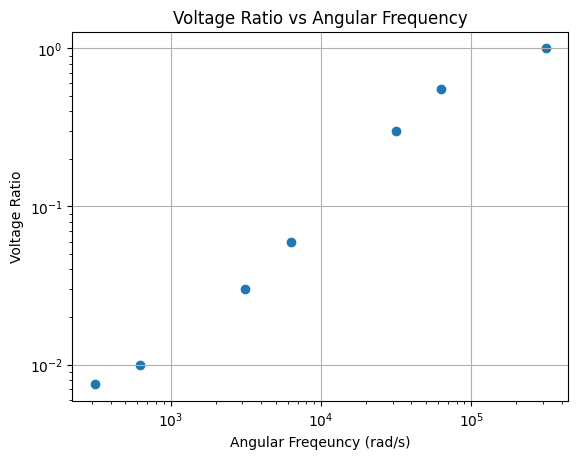

In [4]:
plt.figure()
plt.scatter(omega, ratio, label="Data")
plt.xscale("log")
plt.yscale("log")
plt.title("Voltage Ratio vs Angular Frequency")
plt.xlabel("Angular Freqeuncy (rad/s)")
plt.ylabel("Voltage Ratio")
plt.grid()
plt.show()

In [5]:
from scipy.optimize import curve_fit

def model(omega, tau, A):
    return (A * omega * tau) / np.sqrt(1 + (omega ** 2) * (tau ** 2))

params, cov = curve_fit(model, omega, ratio, p0=[1e-4, 1])
tau_fit, A_fit = params 
tau_err, A_err = np.sqrt(np.diag(cov))

fit_data = model(omega, tau_fit, A_fit)


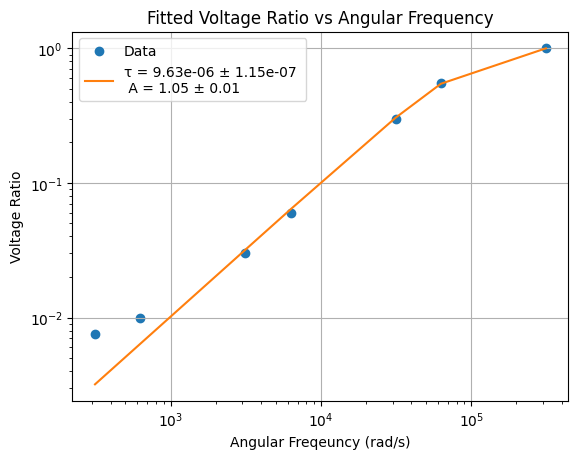

In [6]:
plt.figure()
plt.scatter(omega, ratio, label="Data")
plt.plot(omega, fit_data, label=f"τ = {tau_fit:.2e} ± {tau_err:.2e} \n A = {A_fit:.2f} ± {A_err:.2f}", color="C1")
plt.xscale('log')
plt.yscale('log')
plt.title("Fitted Voltage Ratio vs Angular Frequency")
plt.xlabel("Angular Freqeuncy (rad/s)")
plt.ylabel("Voltage Ratio")
plt.legend()
plt.grid()
plt.show()

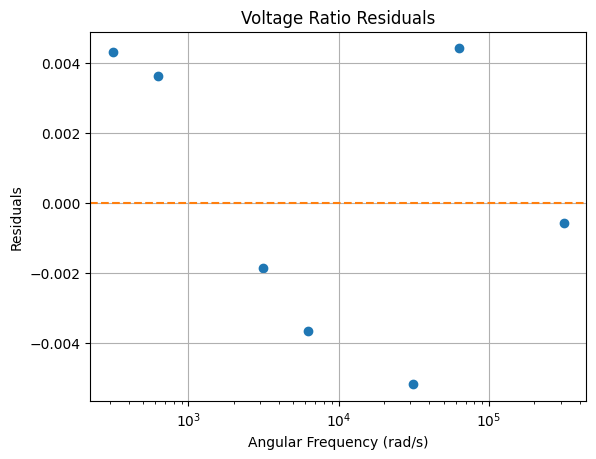

In [ ]:
residuals = ratio - fit_data

plt.figure()
plt.scatter(omega, residuals)
plt.axhline(0, color="C1", linestyle="--")
plt.xscale('log')
plt.title("Voltage Ratio Residuals")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [8]:
phase = data["Phase shift (deg)"] * (np.pi / 180)

def high_pass(omega, tau):
    return np.arctan(1 / (omega * tau))

# popt, pcov = curve_fit(high_pass, omega, phase, p0=[1e-7])
# taufit = popt[0]
# tauerr = np.sqrt(np.diag(cov))

phase_fit = high_pass(omega, tau_fit)

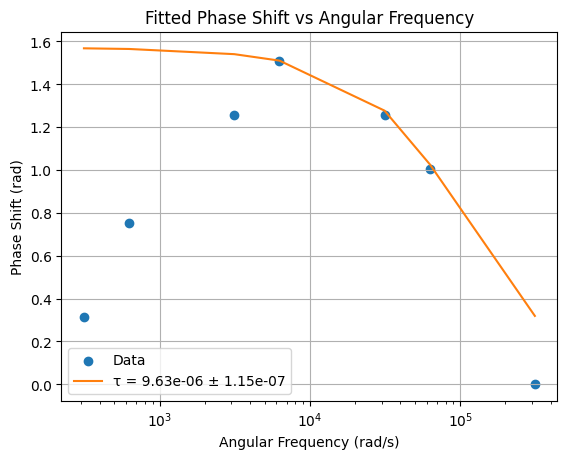

In [9]:
plt.figure()
plt.scatter(omega, phase, label="Data")
plt.plot(omega, phase_fit, color="C1", label=f"τ = {tau_fit:.2e} ± {tau_err:.2e}")
plt.xscale("log")
plt.title("Fitted Phase Shift vs Angular Frequency")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Phase Shift (rad)")
plt.legend()
plt.grid()
plt.show()

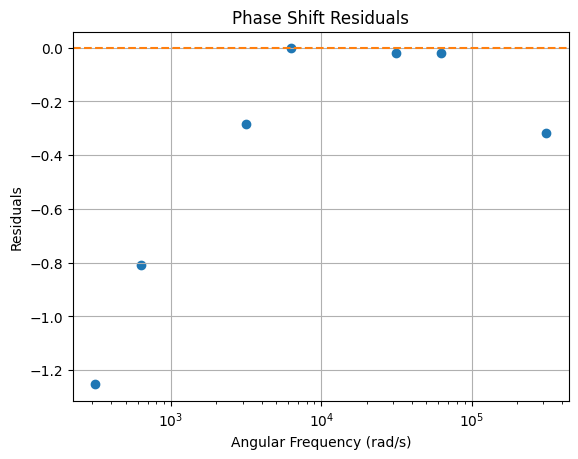

In [10]:
residuals = phase - phase_fit

plt.figure()
plt.scatter(omega, residuals)
plt.axhline(0, color="C1", linestyle="--")
plt.xscale('log')
plt.title("Phase Shift Residuals")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Residuals")
plt.grid()
plt.show()